In [1]:
%matplotlib inline

# Import libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from textatistic import Textatistic

In [2]:
# Global configuration
SEED = 42
np.random.seed(SEED) 
sns.set()
matplotlib.rcParams['figure.dpi'] = 144

In [3]:
# Read data
russian_tweets = pd.read_csv('data/russian_tweets.csv', index_col=0)
print(f'Head of russian_tweets: \n{russian_tweets.head()}')

ted_talk = pd.read_csv('data/ted.csv')
print(f'Head of ted_talk: \n{ted_talk.head()}')

Head of russian_tweets: 
                                                  content
127447  LIVE STREAM VIDEO=> Donald Trump Rallies in Co...
123642  Muslim Attacks NYPD Cops with Meat Cleaver. Me...
226970  .@vfpatlas well that's a swella word there (di...
138339  RT wehking_pamela: Bobby_Axelrod2k MMFlint don...
161610  Жители обстреливаемых районов Донецка проводят...
Head of ted_talk: 
                                          transcript  \
0  We're going to talk — my — a new lecture, just...   
1  This is a representation of your brain, and yo...   
2  It's a great honor today to share with you The...   
3  My passions are music, technology and making t...   
4  It used to be that if you wanted to get a comp...   

                                                 url  
0  https://www.ted.com/talks/al_seckel_says_our_b...  
1  https://www.ted.com/talks/aaron_o_connell_maki...  
2  https://www.ted.com/talks/carter_emmart_demos_...  
3  https://www.ted.com/talks/jared_ficklin_new_wa..

# 1. Basic features and readability scores

Learn to compute basic features such as number of words, number of characters, average word length and number of special characters (such as Twitter hashtags and mentions). You will also learn to compute readability scores and determine the amount of education required to comprehend a piece of text.

## 1.1. Introduction to NLP feature engineering

1. Introduction to NLP feature engineering
>Welcome to Feature Engineering for NLP in Python! I am Rounak and I will be your instructor for this course. In this course, you will learn to extract useful features out of text and convert them into formats that are suitable for machine learning algorithms.

2. Numerical data
>For any ML algorithm, data fed into it must be in tabular form and all the training features must be numerical. Consider the Iris dataset. Every training instance has exactly four numerical features. The ML algorithm uses these four features to train and predict if an instance belongs to class iris-virginica, iris-setosa or iris-versicolor.

3. One-hot encoding
>ML algorithms can also work with categorical data provided they are converted into numerical form through one-hot encoding. Let's say you have a categorical feature 'sex' with two categories 'male' and 'female'.

4. One-hot encoding
>One-hot encoding will convert this feature into two features,

5. One-hot encoding
>'sex_male' and 'sex_female' such that each male instance has a 'sex_male' value of 1 and 'sex_female' value of 0. For females, it is the vice versa.

6. One-hot encoding with pandas
>To do this in code, we use pandas' get_dummies() function. Let's import pandas using the alias pd. We can then pass our dataframe df into the pd.get_dummies() function and pass a list of features to be encoded as the columns argument. Not mentioning columns will lead pandas to automatically encode all non-numerical features. Finally, we overwrite the original dataframe with the encoded version by assigning the dataframe returned by get_dummies() back to df.

7. Textual data
>Consider a movie reviews dataset. This data cannot be utilized by any machine learning or ML algorithm. The training feature 'review' isn't numerical. Neither is it categorical to perform one-hot encoding on.

8. Text pre-processing
>We need to perform two steps to make this dataset suitable for ML. The first is to standardize the text. This involves steps like converting words to lowercase and their base form. For instance, 'Reduction' gets lowercased and then converted to its base form, reduce. We will cover these concepts in more detail in subsequent lessons.

9. Vectorization
>After preprocessing, the reviews are converted into a set of numerical training features through a process known as vectorization. After vectorization, our original review dataset gets converted

10. Vectorization
>into something like this. We will learn techniques to achieve this in later lessons.

11. Basic features
>We can also extract certain basic features from text. It maybe useful to know the word count, character count and average word length of a particular text. While working with niche data such as tweets, it also maybe useful to know how many hashtags have been used in a tweet. This tweet by Silverado Records,for instance, uses two.

12. POS tagging
>So far, we have seen how to extract features out of an entire body of text. Some NLP applications may require you to extract features for individual words. For instance, you may want to do parts-of-speech tagging to know the different parts-of-speech present in your text as shown. As an example, consider the sentence 'I have a dog'. POS tagging will label each word with its corresponding part-of-speech.

13. Named Entity Recognition
>You may also want to know perform named entity recognition to find out if a particular noun is referring to a person, organization or country. For instance, consider the sentence "Brian works at DataCamp". Here, there are two nouns "Brian" and "DataCamp". Brian refers to a person whereas DataCamp refers to an organization.

14. Concepts covered
>Therefore, broadly speaking, this course will teach you how to conduct text preprocessing, extract certain basic features, word features and convert documents into a set of numerical features (using a process known as vectorization).

15. Let's practice!
>Great! Now, let's practice!

In [4]:
df = pd.DataFrame({'sex': ['female', 'male', 'female', 'male', 'female']})
print(df)

# Perform one-hot encoding on the 'sex' feature of df
df = pd.get_dummies(df, columns=['sex'])
print(df)

      sex
0  female
1    male
2  female
3    male
4  female
   sex_female  sex_male
0           1         0
1           0         1
2           1         0
3           0         1
4           1         0


## 1.2. Data format for ML algorithms

**Instructions**
In this exercise, you have been given four dataframes df1, df2, df3 and df4. The final column of each dataframe is the predictor variable and the rest of the columns are training features.

Using the console, determine which dataframe is in a suitable format to be trained by a classifier.

**Possible Answers**
1. df1.head()
|   | feature 1 | feature 2 | feature 3 | feature 4 | feature 5 | label
|---|---|---|---|---|---|---|
| 0 |   29.0000 |         0 |         0 |  211.3375 |    female |     1
| 1 |    0.9167 |         1 |         2 |  151.5500 |      male |     1
| 2 |    2.0000 |         1 |         2 |  151.5500 |    female |     0
| 3 |   30.0000 |         1 |         2 |  151.5500 |      male |     0
| 4 |   25.0000 |         1 |         2 |  151.5500 |    female |     0

2. df2.head()
|   | feature 1 | feature 2 | feature 3 | feature 4 | feature 5 |     label
|---|---|---|---|---|---|---|
| 0 | -1.745293 | -0.837162 | -0.885481 | -0.190082 | -0.111161 | -2.835741
| 1 | -1.113249 | -1.101384 |  1.132069 |  0.361661 | -0.265301 | -0.320568
| 2 |  0.055839 |  1.207450 | -0.899675 |  0.933430 |  0.382975 | -0.713869
| 3 |  0.816374 |  0.698360 |  0.497912 | -0.298097 | -0.196820 | -1.832008
| 4 | -0.785005 |  0.745289 | -1.212070 |  0.291087 |  1.334375 |  0.848035

3. __df3.head()__ Correct!
|   | feature 1 | feature 2 | feature 3 | feature 4 | feature 5 | label
|---|---|---|---|---|---|---|
| 0 |         1 |        85 |        66 |        29 |         0 |     0
| 1 |         8 |       183 |        64 |         0 |         0 |     1
| 2 |         1 |        89 |        66 |        23 |        94 |     0
| 3 |         0 |       137 |        40 |        35 |       168 |     1
| 4 |         5 |       116 |        74 |         0 |         0 |     0

4. df4.head()
|   |                                         feature 1 | label
|---|---|---|
| 0 | Led by Woody, Andy's toys live happily in his ... |     1
| 1 | When siblings Judy and Peter discover an encha... |     0
| 2 | A family wedding reignites the ancient feud be... |     1
| 3 | Cheated on, mistreated and stepped on, the wom... |     1

**Results**

<font color=darkgreen>Excellent! This dataframe has numerical training features and the predictor variable is a class. Therefore, it is in a suitable format for applying a classification algorithm.</font>

## 1.3. One-hot encoding

In the previous exercise, we encountered a dataframe df1 which contained categorical features and therefore, was unsuitable for applying ML algorithms to.

In this exercise, your task is to convert df1 into a format that is suitable for machine learning.

**Instructions**

1. Use the columns attribute to print the features of df1.
2. Use the pd.get_dummies() function to perform one-hot encoding on feature 5 of df1.
3. Use the columns attribute again to print the new features of df1.
4. Print the first five rows of df1 using head().

**Results**

<font color=darkgreen>Great job! You have successfully performed one-hot encoding on this dataframe. Notice how the feature 5 (which represents sex) gets converted to two features feature 5_male and feature 5_female. With one-hot encoding performed, df1 only contains numerical features and can now be fed into any standard ML model!</font>

In [5]:
df1 = pd.DataFrame({'feature 1': np.random.uniform(low=0, high=80, size=(15,)),
                    'feature 2': np.random.randint(2, size=15),
                    'feature 3': np.random.choice([0, 2], size=15),
                    'feature 4': np.random.uniform(low=0, high=230, size=(15,)),
                    'feature 5': np.random.choice(['female', 'male'], size=15),
                    'label'    : np.random.randint(2, size=15)
                   })
print(df1)

    feature 1  feature 2  feature 3   feature 4 feature 5  label
0   29.963210          0          2  139.735316      male      1
1   76.057145          0          2   39.220548      male      1
2   58.559515          1          0   14.961866      male      1
3   47.892679          1          2  218.243674      male      1
4   12.481491          1          2  222.095368      male      0
5   12.479562          0          0  185.931390      male      1
6    4.646689          1          2   70.061167      male      0
7   69.294092          0          0   22.464586      male      1
8   48.089201          0          2  157.373596      male      1
9   56.645806          0          0  101.235074    female      0
10   1.646760          0          2   28.068794    female      1
11  77.592788          0          2  113.890689      male      0
12  66.595411          1          0    7.909360      male      1
13  16.987129          1          0  209.143692      male      1
14  14.545997          1 

In [6]:
# Print the features of df1
print(df1.columns)

# Perform one-hot encoding
df1 = pd.get_dummies(df1, columns=['feature 5'])

# Print the new features of df1
print(df1.columns)

# Print first five rows of df1
print(df1.head())

Index(['feature 1', 'feature 2', 'feature 3', 'feature 4', 'feature 5',
       'label'],
      dtype='object')
Index(['feature 1', 'feature 2', 'feature 3', 'feature 4', 'label',
       'feature 5_female', 'feature 5_male'],
      dtype='object')
   feature 1  feature 2  feature 3   feature 4  label  feature 5_female  \
0  29.963210          0          2  139.735316      1                 0   
1  76.057145          0          2   39.220548      1                 0   
2  58.559515          1          0   14.961866      1                 0   
3  47.892679          1          2  218.243674      1                 0   
4  12.481491          1          2  222.095368      0                 0   

   feature 5_male  
0               1  
1               1  
2               1  
3               1  
4               1  


## 1.4. Basic feature extraction

1. Basic feature extraction
>In this video, we will learn to extract certain basic features from text. While not very powerful, they can give us a good idea of the text we are dealing with.

2. Number of characters
>The most basic feature we can extract from text is the number of characters, including whitespaces. For instance, the string "I don't know." has 13 characters. The number of characters is the length of the string. Python gives us a built-in len() function which returns the length of the string passed into it. The output will be 13 here too. If our dataframe df has a textual feature (say 'review'), we can compute the number of characters for each review and store it as a new feature 'num_chars' by using the pandas dataframe apply method. This is done by creating df['num_chars'] and assigning it to df['review'].apply(len).

3. Number of words
>Another feature we can compute is the number of words. Assuming that every word is separated by a space, we can use a string's split() method to convert it into a list where every element is a word. In this example, the string Mary had a little lamb is split to create a list containing the words Mary, had, a, little and lamb. We can now compute the number of words by computing the number of elements in this list using len().

4. Number of words
>To do this for a textual feature in a dataframe, we first define a function that takes in a string as an argument and returns the number of words in it. The steps followed inside the function are similar as before. We then pass this function word_count into apply. We create df['num_words'] and assign it to df['review'].apply(word_count).

5. Average word length
>Let's now compute the average length of words in a string. Let's define a function avg_word_length() which takes in a string and returns the average word length. We first split the string into words and compute the length of each word. Next, we compute the average word length by dividing the sum of the lengths of all words by the number of words.

6. Average word length
>We can now pass this into apply() to generate a average word length feature like before.

7. Special features
>When working with data such as tweets, it maybe useful to compute the number of hashtags or mentions used. This tweet by DataCamp, for instance, has one mention upendra_35 which begins with an @ and two hashtags, PySpark and Spark which begin with a #.

8. Hashtags and mentions
>Let's write a function that computes the number of hashtags in a string. We split the string into words. We then use list comprehension to create a list containing only those words that are hashtags. We do this using the startswith method of strings to find out if a word begins with #. The final step is to return the number of elements in this list using len. The procedure to compute number of mentions is identical except that we check if a word starts with @. Let's see this function in action. When we pass a string "@janedoe This is my first tweet! #FirstTweet #Happy", the function returns 2 which is indeed the number of hashtags in the string.

9. Other features
>There are other basic features we can compute such as number of sentences, number of paragraphs, number of words starting with an uppercase, all-capital words, numeric quantities etc. The procedure to do this is extremely similar to the ones we've already covered.

10. Let's practice!
>That's enough theory for now. Let's practice!

In [7]:
#tweets = russian_tweets.copy(deep=True)
df = pd.DataFrame({})

# Number of characters
df['num_chars'] = russian_tweets['content'].apply(len)

# Number of words
df['num_words'] = russian_tweets['content'].apply(lambda x: len(x.split()))

# Average word length
df['avg_word_length'] = russian_tweets['content'].apply(lambda x: sum([len(w) for w in x.split()])/len(x.split()))

# Hashtags and mentions
df['hashtag_count'] = russian_tweets['content'].apply(lambda x: len([w for w in x.split() if (w.startswith('#') and len(w)>1)]))

# Hashtags and mentions
df['mentions_count'] = russian_tweets['content'].apply(lambda x: len([w for w in x.split() if (w.startswith('@') and len(w)>1)]))

print(df.head())

        num_chars  num_words  avg_word_length  hashtag_count  mentions_count
127447        130         15         7.733333              0               0
123642        138         15         8.066667              1               0
226970         65         12         4.500000              0               0
138339        139         14         9.000000              0               0
161610        131         13         9.076923              1               0


## 1.5. Character count of Russian tweets

In this exercise, you have been given a dataframe __tweets__ which contains some tweets associated with Russia's Internet Research Agency and compiled by FiveThirtyEight.

Your task is to create a new feature 'char_count' in __tweets__ which computes the number of characters for each tweet. Also, compute the average length of each tweet. The tweets are available in the content feature of __tweets__.

_Be aware that this is real data from Twitter and as such there is always a risk that it may contain profanity or other offensive content (in this exercise, and any following exercises that also use real Twitter data)._

**Instructions**

1. Create a new feature char_count by applying len to the 'content' feature of tweets.
2. Print the average character count of the tweets by computing the mean of the 'char_count' feature.

**Results**

<font color=darkgreen>Great job! Notice that the average character count of these tweets is approximately 104, which is much higher than the overall average tweet length of around 40 characters. Depending on what you're working on, this may be something worth investigating into. For your information, there is research that indicates that fake news articles tend to have longer titles! Therefore, even extremely basic features such as character counts can prove to be very useful in certain applications.</font>

In [8]:
# Prepare data
tweets = russian_tweets.copy(deep=True)

# Create a feature char_count
tweets['char_count'] = tweets['content'].apply(len)

# Print the average character count
print(tweets['char_count'].mean())

103.462


## 1.6. Word count of TED talks

__ted__ is a dataframe that contains the transcripts of 500 TED talks. Your job is to compute a new feature __word_count__ which contains the approximate number of words for each talk. Consequently, you also need to compute the average word count of the talks. The transcripts are available as the __transcript__ feature in __ted__.

In order to complete this task, you will need to define a function __count_words__ that takes in a string as an argument and returns the number of words in the string. You will then need to apply this function to the __transcript__ feature of __ted__ to create the new feature word_count and compute its mean.

**Instructions**

1. Split string into a list of words using the split() method.
2. Return the number of elements in words using len().
3. Apply your function to the transcript column of ted to create the new feature word_count.
4. Compute the average word count of the talks using mean().

**Results**

<font color=darkgreen>Amazing work! You now know how to compute the number of words in a given piece of text. Also, notice that the average length of a talk is close to 2000 words. You can use the word_count feature to compute its correlation with other variables such as number of views, number of comments, etc. and derive extremely interesting insights about TED.</font>

In [9]:
# Prepare data
ted = ted_talk.copy(deep=True)

# Number of words
ted['num_words'] = ted['transcript'].apply(lambda x: len(x.split()))

# Print the average character count
print(ted['num_words'].mean())

1987.1


## 1.7. Hashtags and mentions in Russian tweets

Let's revisit the __tweets__ dataframe containing the Russian tweets. In this exercise, you will compute the number of hashtags and mentions in each tweet by defining two functions __count_hashtags()__ and __count_mentions()__ respectively and applying them to the __content__ feature of __tweets__.

In case you don't recall, the tweets are contained in the __content__ feature of __tweets__.

**Instructions**

1. In the list comprehension, use startswith() to check if a particular word starts with '#'.
2. In the list comprehension, use startswith() to check if a particular word starts with '@'.

**Results**

<font color=darkgreen>Excellent work! You now have a good grasp of how to compute various types of summary features. In the next lesson, we will learn about more advanced features that are capable of capturing more nuanced information beyond simple word and character counts.</font>

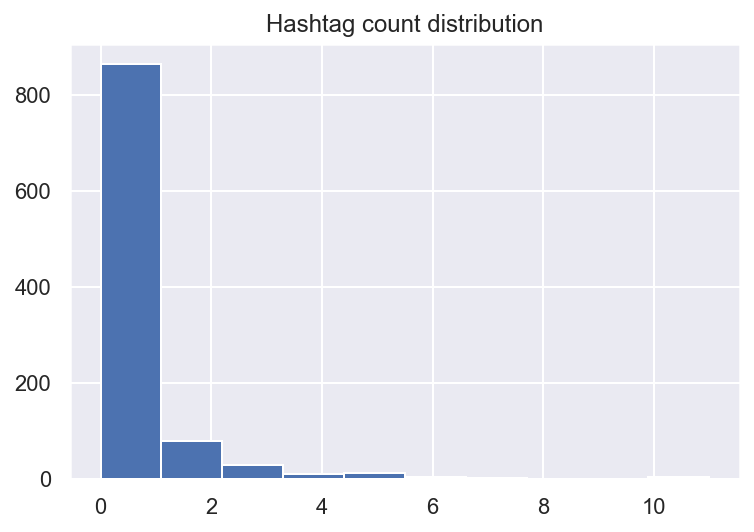

In [10]:
# Prepare data
tweets = russian_tweets.copy(deep=True)

# Create a feature hashtag_count and display distribution
tweets['hashtag_count'] = tweets['content'].apply(lambda x: len([w for w in x.split() if (w.startswith('#') and len(w)>1)]))

plt.title('Hashtag count distribution')
tweets['hashtag_count'].hist()
plt.show()

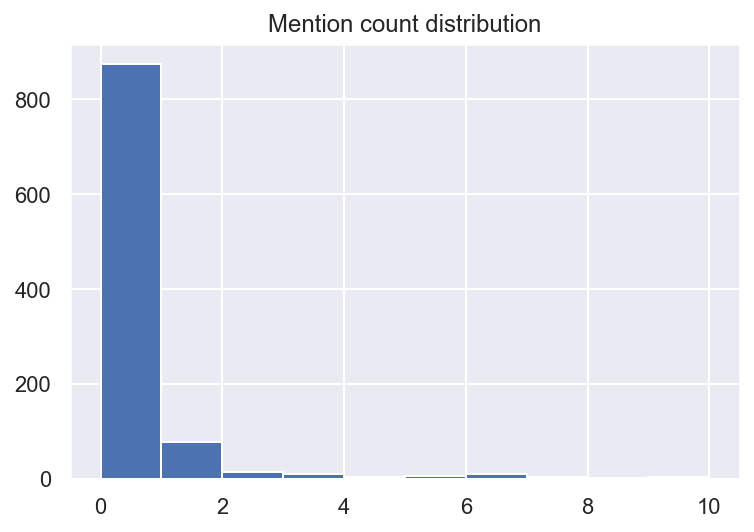

In [11]:
# Create a feature mention_count and display distribution
tweets['mention_count'] = tweets['content'].apply(lambda x: len([w for w in x.split() if (w.startswith('@') and len(w)>1)]))

plt.title('Mention count distribution')
tweets['mention_count'].hist()
plt.show()

## 1.8. Readability tests


1. Readability tests
>In this lesson, we will look at a set of interesting features known as readability tests.

2. Overview of readability tests
>These tests are used to determine the readability of a particular passage. In other words, it indicates at what educational level a person needs to be in, in order to comprehend a particular piece of text. The scale usually ranges from primary school up to college graduate level and is in context of the American education system. Readability tests are done using a mathematical formula that utilizes the word, syllable and sentence count of the passage. They are routinely used by organizations to determine how easy their publications are to understand. They have also found applications in domains such as fake news and opinion spam detection.

3. Readability text examples
>There are a variety of readability tests in use. Some of the common ones include the Flesch reading ease, the Gunning fog index, the simple measure of gobbledygook or SMOG and the Dale-Chall score. Note that these tests are used for texts in English. Tests for other languages also exist that that take into consideration, the nuances of that particular language. For the sake of brevity, we will cover only the

4. Readability test examples
>first two scores in detail. However, once you understand them, you will be in a good position to understand and use the other scores too.

5. Flesch reading ease
>The Flesch Reading Ease is one of the oldest and most widely used readability tests. The score is based on two ideas: the first is that the greater the average sentence length, harder the text is to read. Consider these two sentences. The first is easier to follow than the second. The second is that the greater the average number of syllables in a word, the harder the text is to read. Therefore, I live in my home is considered easier to read than I reside in my domicile on account of its usage of lesser syllables per word. The higher the Flesch Reading Ease score, the greater is the readability. Therefore, a higher score indicates that the text is easier to understand.

6. Flesch reading ease score interpretation
>This table shows how to interpret the Flesch Reading Ease scores. A score above 90 would imply that the text is comprehensible to a 5th grader whereas a score below 30 would imply the text can only be understood by college graduates.

7. Gunning fog index
>The Gunning fog index was developed in 1954. Like Flesch, this score is also dependent on the average sentence length. However, it uses percentage of complex words in place of average syllables per word to compute its score. Here, complex words refer to all words that have three or more syllables. Unlike Flesch, the formula for Gunning fog index is such that the higher the score ,the more difficult the passage is to understand.

8. Gunning fog index interpretation
>The index can be interpreted using this table. A score of 6 would indicate 6th grade reading difficulty whereas a score of 17 would indicate college graduate level reading difficulty.

9. The textatistic library
>We can conduct these readability tests in Python using the Textatistic library. We import the Textatistic class from textatistic. Next, we create a Textatistic object and pass in the passage or text we're evaluating. We then access the dictionary of readability scores from the Textatistic object using the 'scores' attribute and store it in a variable named readability_scores. Finally, we access the various scores from the readability_scores dictionary using their corresponding keys as shown. In this example, the text that was passed is between the reading level of a college senior and that of a college graduate.

10. Let's practice!
>Let's now practice computing readability scores using the textatistic library in the exercises.

In [12]:
my_texts = ["This is a short sentence.", 
            "This is longer sentence with more words and it is harder to follow than the first sentence.",
            "I live in my home.",
            "I reside in my domicile.",
            "A neuron has three main parts: dendrites, an axon, and a cell body or soma."]

def flesh_interpretation(punctuation):
    """Return Flesch reading ease score interpretation."""
    if punctuation >= 90  : return '5th grade level'
    elif punctuation >= 80: return '6th grade level'
    elif punctuation >= 70: return '7th grade level'
    elif punctuation >= 60: return '8th or 9th grade level'
    elif punctuation >= 50: return '10th to 12th grade level'
    elif punctuation >= 30: return 'College level'
    else: return 'College graduate level'

def gunning_fog_interpretation(punctuation):
    """Return Gunning fog reading ease score interpretation."""
    if punctuation >= 17  : return 'College graduate level'
    elif punctuation >= 16: return 'College senior level'
    elif punctuation >= 15: return 'College junior level'
    elif punctuation >= 14: return 'College sophomore level'
    elif punctuation >= 13: return 'College freshman level'
    elif punctuation >= 12: return 'High school senior level'
    elif punctuation >= 11: return 'High school junior level'
    elif punctuation >= 10: return 'High school sophomore level'
    elif punctuation >=  9: return 'High school freshman level'
    elif punctuation >=  8: return 'Eighth grade level'
    elif punctuation >=  7: return 'Seventh grade level'
    elif punctuation >=  6: return 'Sixth grade level'
    else: return 'Fifth grade level'

for text in my_texts:
    # Create a Textatistic Object
    readability_scores = Textatistic(text).scores
    
    # Generate scores
    fs = readability_scores['flesch_score']
    gs = readability_scores['gunningfog_score']
    print('{} \nFlesch score: {} ({})'.format(text, fs, flesh_interpretation(fs)))
    print('Gunning fog score: {} ({})\n'.format(gs, gunning_fog_interpretation(gs)))

This is a short sentence. 
Flesch score: 100.24000000000002 (5th grade level)
Gunning fog score: 2.0 (Fifth grade level)

This is longer sentence with more words and it is harder to follow than the first sentence. 
Flesch score: 90.05058823529413 (5th grade level)
Gunning fog score: 6.800000000000001 (Sixth grade level)

I live in my home. 
Flesch score: 117.16000000000003 (5th grade level)
Gunning fog score: 2.0 (Fifth grade level)

I reside in my domicile. 
Flesch score: 83.32000000000004 (6th grade level)
Gunning fog score: 2.0 (Fifth grade level)

A neuron has three main parts: dendrites, an axon, and a cell body or soma. 
Flesch score: 95.73000000000002 (5th grade level)
Gunning fog score: 6.0 (Sixth grade level)



## 1.9. Readability of 'The Myth of Sisyphus'

In this exercise, you will compute the Flesch reading ease score for Albert Camus' famous essay The Myth of Sisyphus. We will then interpret the value of this score as explained in the video and try to determine the reading level of the essay.

The entire essay is in the form of a string and is available as __sisyphus_essay__.

**Instructions**

1. Import the Textatistic class from textatistic.
2. Compute the readability_scores dictionary for sisyphus_essay using Textatistic.
3. Print the Flesch reading ease score from the readability_scores dictionary.

**Results**

<font color=darkgreen>Excellent! You now know to compute the Flesch reading ease score for a given body of text. Notice that the score for this essay is approximately 81.67. This indicates that the essay is at the readability level of a 6th grade American student.</font>

In [13]:
# Read the essay to analize
with open('data/sisyphus_essay.dat','r') as f: 
    sisyphus_essay = f.read() 
    
# Compute the readability scores 
readability_scores = Textatistic(sisyphus_essay).scores

# Print the flesch reading ease score
flesch = readability_scores['flesch_score']
print("The Flesch Reading Ease is %.2f (%s)." % (flesch, flesh_interpretation(flesch)))

The Flesch Reading Ease is 81.67 (6th grade level).


## 1.10. Readability of various publications

In this exercise, you have been given excerpts of articles from four publications. Your task is to compute the readability of these excerpts using the Gunning fog index and consequently, determine the relative difficulty of reading these publications.

The excerpts are available as the following strings:

- __forbes__ - An excerpt from an article from Forbes magazine on the Chinese social credit score system.
- __harvard_law__ - An excerpt from a book review published in Harvard Law Review.
- __r_digest__ - An excerpt from a Reader's Digest article on flight turbulence.
- __time_kids__ - An excerpt from an article on the ill effects of salt consumption published in TIME for Kids.

**Instructions**

1. Import the Textatistic class from textatistic.
2. Compute the readability_scores dictionary for each excerpt using Textatistic.
3. Select the Gunning fog index from the readability_scores dictionary for each excerpt and append it to gunning_fog_scores.
4. Print the list of Gunning fog indices.

**Results**

<font color=darkgreen>Great job! You are now adept at computing readability scores for various pieces of text. Notice that the Harvard Law Review excerpt has the highest Gunning fog index; indicating that it can be comprehended only by readers who have graduated college. On the other hand, the Time for Kids article, intended for children, has a much lower fog index and can be comprehended by 5th grade students.</font>

In [14]:
# List of excerpts
articles = ['forbes', 'harvard_law', 'r_digest', 'time_kids']

# Loop through excerpts and compute gunning fog index
for article in articles:
    # Read the essay to analize
    with open(f'data/{article}.dat','r', encoding='utf-8') as f: 
        excerpt = f.read() 
    readability_scores = Textatistic(excerpt).scores
    gunning_fog = readability_scores['gunningfog_score']
    
    # Print the gunning fog indices
    print('The Gunning Fog "%s" essay is %.2f (%s).' % (article, gunning_fog, gunning_fog_interpretation(gunning_fog)))

The Gunning Fog "forbes" essay is 14.44 (College sophomore level).
The Gunning Fog "harvard_law" essay is 20.74 (College graduate level).
The Gunning Fog "r_digest" essay is 11.09 (High school junior level).
The Gunning Fog "time_kids" essay is 5.93 (Fifth grade level).


# Aditional material

- Datacamp course: https://learn.datacamp.com/courses/feature-engineering-for-nlp-in-python
- Spanish readable test:
    - Python package: https://pypi.org/project/legibilidad/
    - Documentation: https://gitlab.com/__alexander__/legibilidad
    - Demo online: https://legible.es/
- Related to legibility formula: https://stackoverflow.com/questions/49251629/converting-readability-formula-into-python-function